In [1]:
from IPython.display import display

import itertools

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.style.use('default')


In [3]:
_palette = sns.color_palette("bright", n_colors=10 )
PALETTE = {
    "SDCD": _palette[1],
    "SDCD-GPU": _palette[1],
    "DCDI": _palette[0],
    "NOTEARS": _palette[2],
    "NOBEARS": _palette[4],
    "DCDFG": _palette[6],
    "DAGMA": _palette[9],
    "GIES": _palette[8],
    "sortnregress": _palette[7],
}

# Interventional benchmark

In [4]:
data = pd.read_csv("./final_experiments/interventions-frac.csv")

data=data[data["State"] == "finished"]
data=data[data["seed"].isin([0,1,2,3,4])]


In [5]:
# SDCD and DCDI were ran on seeds 0,1,2,3,4
# DCD-FG and GIES only on seeds 0,1,2 (they have very poor SHD so not worth it to evaluate on more seeds)
# only include seeds 0,1,2 when comparing all methods
# sometimes DCDI crashed and so no SHD is reported

data.groupby(["Name", "d", "s"]).count()[["shd"]].reset_index().pivot_table(index="Name", columns=("d", "s"), values="shd")


d        20                      30                      40                  
s         2     4     6     8     2     4     6     8     2     4     6     8
Name                                                                         
DCDFG  15.0  15.0  15.0  15.0  15.0  15.0  15.0  15.0  15.0  15.0  15.0  15.0
DCDI   25.0  25.0  25.0  25.0  23.0  23.0  23.0  25.0  22.0  21.0  20.0  18.0
GIES   15.0  15.0  15.0  15.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
SDCD   25.0  25.0  25.0  25.0  25.0  25.0  25.0  25.0  25.0  25.0  25.0  25.0

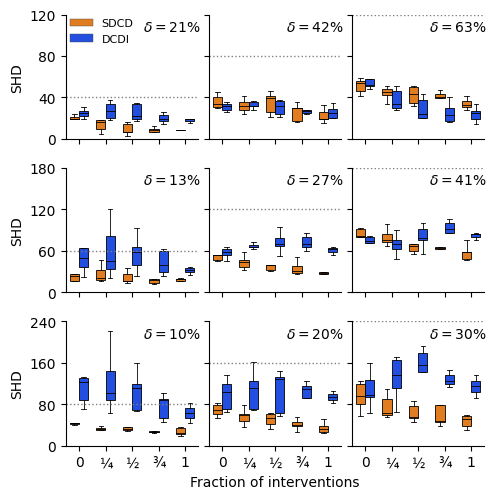

In [6]:
# plot
n_d = 3
n_s = 3
fig, axs = plt.subplots(n_d, n_s, figsize=(1.7 * n_s, 1.7 * n_d), sharex=True, sharey="row", dpi=100)


PROPS = {
    'boxprops':{'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'},
    "linewidth":0.6,
    "width": 0.7,
    "showfliers":False,
}

fdata = data[data["Name"].isin(["SDCD", "DCDI"])]
ds = [20, 30, 40]
ss = [2, 4, 6]

for i, d in enumerate(ds):
    n_edges = []
    for j, s in enumerate(ss):
        ax = axs[i, j]
        sns.boxplot(
            data=fdata[(fdata["d"] == d) & (fdata["s"] == s)],
            x="intervention_frac",
            y="shd",
            hue="Name",
            ax=ax,
            hue_order=["SDCD", "DCDI"],
            palette=PALETTE,
            **PROPS,
        )
        n_edge = d*s
        n_edges.append(n_edge)
        ax.axhline(n_edge, 0,1, c="gray", lw=1, ls=":")

        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        #         ax.set_xlim(0,1)
        
        info = f"$\\delta={int(s*2 / (d-1)*100)}\\%$"
        ax.text(0.8, 0.9, info,
             horizontalalignment='center',
             verticalalignment='center',
             transform = ax.transAxes
        )

#         ax.set_title(info)
        if i == n_d - 1:
            ax.set_xlabel("Intervention Fraction")
        if j == 0:
            ax.set_ylabel("SHD")
        else:
            ax.set_ylabel("")
        if i == 2:
            if j == 1:
                ax.set_xlabel("Fraction of interventions")
            else:
                ax.set_xlabel("")
                
            ax.set_xticklabels(["0", "¼", "½", "¾", "1"])
        else:
            ax.set_xlabel("")
#         ax.legend()

        if i == 0 and j == 0:
            legend = ax.legend(loc="upper left", fontsize=8,bbox_to_anchor=(-0.04,1.05) )
            legend.set_title(None)
            legend.set_frame_on(False)
        else:
            ax.get_legend().set_visible(False)
    
    ax.set_ylim(0, max(n_edges))
    ax.set_yticks([0] + n_edges)
    

fig.tight_layout(w_pad=0, )
plt.savefig("intervention.frac.svg", bbox_inches="tight", pad_inches=0, )


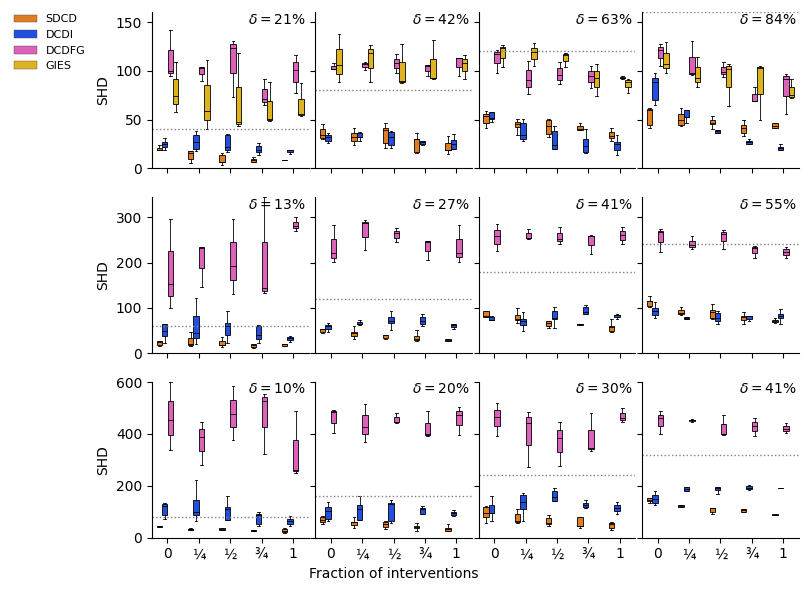

In [7]:
# plot intervention w dcdfg and gies
n_d = 3
n_s = 4
fig, axs = plt.subplots(n_d, n_s, figsize=(2 * n_s, 2 * n_d), sharex=True, sharey="row", dpi=100)


PROPS = {
    'boxprops':{'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'},
    "linewidth":0.6,
    "width": 0.7,
    "showfliers":False,
}

# data = data[data["Name"].isin(["SDCD", "DCDI"])]
ds = [20, 30, 40]
ss = [2, 4, 6, 8]

for i, d in enumerate(ds):
    n_edges = []
    max_d_shd = data[(data["d"] == d)]["shd"].max()
    for j, s in enumerate(ss):
        ax = axs[i, j]
        ds_data = data[(data["d"] == d) & (data["s"] == s)]
        sns.boxplot(
            data=ds_data,
            x="intervention_frac",
            y="shd",
            hue="Name",
            ax=ax,
            hue_order=["SDCD", "DCDI", "DCDFG", "GIES"],
            palette=PALETTE,
            **PROPS,
        )
        n_edge = d*s
        n_edges.append(n_edge)
        ax.axhline(n_edge, 0,1, c="gray", lw=1, ls=":")

        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        #         ax.set_xlim(0,1)
        
        info = f"$\\delta={int(s*2 / (d-1)*100)}\\%$"
        ax.text(0.8, 0.95, info,
             horizontalalignment='center',
             verticalalignment='center',
             transform = ax.transAxes
        )

#         ax.set_title(info)
        if i == n_d - 1:
            ax.set_xlabel("Intervention Fraction")
        if j == 0:
            ax.set_ylabel("SHD")
        else:
            ax.set_ylabel("")
        if i == 2:
            if j == 1:
                ax.set_xlabel("Fraction of interventions")
            else:
                ax.set_xlabel("")
                
            ax.set_xticklabels(["0", "¼", "½", "¾", "1"])
        else:
            ax.set_xlabel("")
#         ax.legend()

        if i == 0 and j == 0:
            legend = ax.legend(loc="upper left", fontsize=8,bbox_to_anchor=(-.94,1.05) )
            legend.set_title(None)
            legend.set_frame_on(False)
        else:
            ax.get_legend().set_visible(False)
    
    ax.set_ylim(0, max(max(n_edges), max_d_shd))
    # ax.set_yticks([0] + n_edges)
    

fig.tight_layout(w_pad=0, )
plt.savefig("intervention_full.frac.svg", bbox_inches="tight", pad_inches=0, )

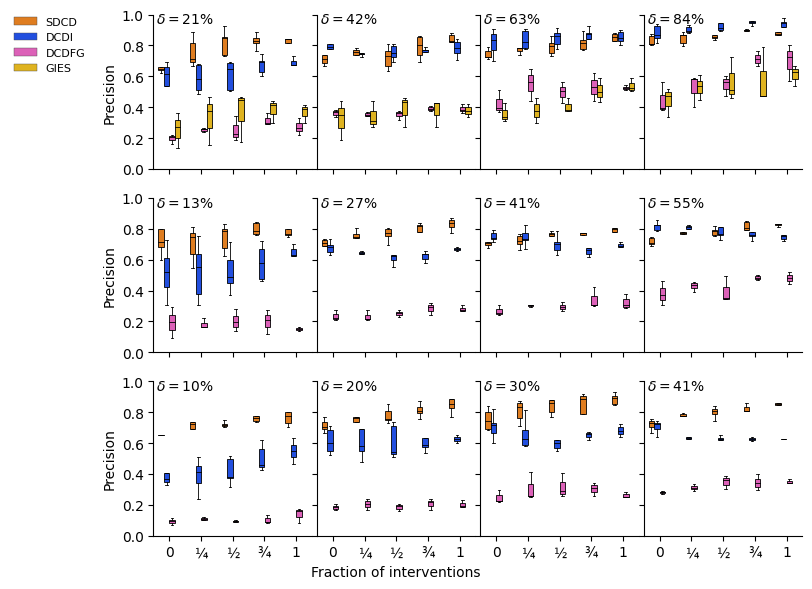

In [8]:
# plot intervention w.r.t. precisio
n_d = 3
n_s = 4
fig, axs = plt.subplots(n_d, n_s, figsize=(2 * n_s, 2 * n_d), sharex=True, sharey="row", dpi=100)


PROPS = {
    'boxprops':{'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'},
    "linewidth":0.6,
    "width": 0.7,
    "showfliers":False,
}

# data = data[data["Name"].isin(["SDCD", "DCDI"])]
ds = [20, 30, 40]
ss = [2, 4, 6, 8]

for i, d in enumerate(ds):
    n_edges = []
    max_d_shd = data[(data["d"] == d)]["shd"].max()
    for j, s in enumerate(ss):
        ax = axs[i, j]
        ds_data = data[(data["d"] == d) & (data["s"] == s)]
        sns.boxplot(
            data=ds_data,
            x="intervention_frac",
            y="precision",
            hue="Name",
            ax=ax,
            hue_order=["SDCD", "DCDI", "DCDFG", "GIES"],
            palette=PALETTE,
            **PROPS,
        )
        n_edge = d*s
        n_edges.append(n_edge)
        ax.axhline(n_edge, 0,1, c="gray", lw=1, ls=":")

        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        #         ax.set_xlim(0,1)
        
        info = f"$\\delta={int(s*2 / (d-1)*100)}\\%$"
        ax.text(0.2, 0.97, info,
             horizontalalignment='center',
             verticalalignment='center',
             transform = ax.transAxes
        )

#         ax.set_title(info)
        if i == n_d - 1:
            ax.set_xlabel("Intervention Fraction")
        if j == 0:
            ax.set_ylabel("Precision")
        else:
            ax.set_ylabel("")
        if i == 2:
            if j == 1:
                ax.set_xlabel("Fraction of interventions")
            else:
                ax.set_xlabel("")
                
            ax.set_xticklabels(["0", "¼", "½", "¾", "1"])
        else:
            ax.set_xlabel("")
#         ax.legend()

        if i == 0 and j == 0:
            legend = ax.legend(loc="upper left", fontsize=8,bbox_to_anchor=(-.94,1.05) )
            legend.set_title(None)
            legend.set_frame_on(False)
        else:
            ax.get_legend().set_visible(False)
    
    ax.set_ylim(0, 1)
    # ax.set_yticks([0] + n_edges)
    

fig.tight_layout(w_pad=0, )
plt.savefig("intervention_full_precision.frac.svg", bbox_inches="tight", pad_inches=0, )

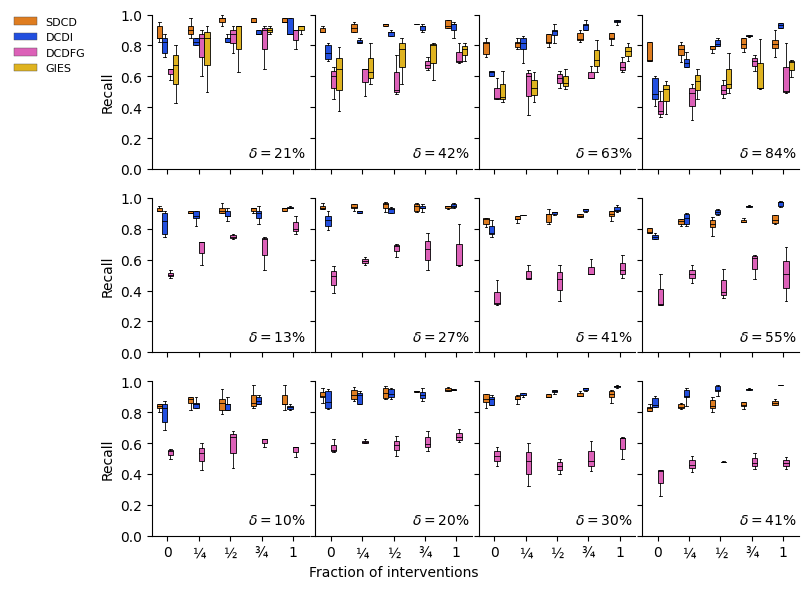

In [9]:
# plot intervention w.r.t. precisio
n_d = 3
n_s = 4
fig, axs = plt.subplots(n_d, n_s, figsize=(2 * n_s, 2 * n_d), sharex=True, sharey="row", dpi=100)


PROPS = {
    'boxprops':{'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'},
    "linewidth":0.6,
    "width": 0.7,
    "showfliers":False,
}

# data = data[data["Name"].isin(["SDCD", "DCDI"])]
ds = [20, 30, 40]
ss = [2, 4, 6, 8]

for i, d in enumerate(ds):
    n_edges = []
    max_d_shd = data[(data["d"] == d)]["shd"].max()
    for j, s in enumerate(ss):
        ax = axs[i, j]
        ds_data = data[(data["d"] == d) & (data["s"] == s)]
        sns.boxplot(
            data=ds_data,
            x="intervention_frac",
            y="recall",
            hue="Name",
            ax=ax,
            hue_order=["SDCD", "DCDI", "DCDFG", "GIES"],
            palette=PALETTE,
            **PROPS,
        )
        n_edge = d*s
        n_edges.append(n_edge)
        ax.axhline(n_edge, 0,1, c="gray", lw=1, ls=":")

        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        #         ax.set_xlim(0,1)
        
        info = f"$\\delta={int(s*2 / (d-1)*100)}\\%$"
        ax.text(0.8, 0.1, info,
             horizontalalignment='center',
             verticalalignment='center',
             transform = ax.transAxes
        )

#         ax.set_title(info)
        if i == n_d - 1:
            ax.set_xlabel("Intervention Fraction")
        if j == 0:
            ax.set_ylabel("Recall")
        else:
            ax.set_ylabel("")
        if i == 2:
            if j == 1:
                ax.set_xlabel("Fraction of interventions")
            else:
                ax.set_xlabel("")
                
            ax.set_xticklabels(["0", "¼", "½", "¾", "1"])
        else:
            ax.set_xlabel("")
#         ax.legend()

        if i == 0 and j == 0:
            legend = ax.legend(loc="upper left", fontsize=8,bbox_to_anchor=(-.94,1.05) )
            legend.set_title(None)
            legend.set_frame_on(False)
            legend.get_texts()[0].set_text('SDCD')
        else:
            ax.get_legend().set_visible(False)
    
    ax.set_ylim(0, 1)
    # ax.set_yticks([0] + n_edges)
    

fig.tight_layout(w_pad=0, )
plt.savefig("intervention_full_recall.frac.svg", bbox_inches="tight", pad_inches=0, )

In [10]:
# shd data as a table
def format_mean_std(row):
    if np.isnan(row[('shd', 'mean')]):
        return "NA"
    return f"{row[('shd', 'mean')]:.1f} ${{\scriptstyle \pm {row[('shd', 'std')]:.1f}}}$"

data['method'] = pd.Categorical(data['Name'], categories=["SDCD", "DCDI", "DCDFG", "GIES"], ordered=True)
grouped = data.groupby(['method', 's', 'd', 'intervention_frac']).agg({'shd': ['mean', 'std']}).reset_index()
grouped['combined'] = grouped.apply(format_mean_std, axis=1)
pivot_table = pd.pivot_table(grouped, values='combined', index=['s', 'd', 'intervention_frac'], columns=['method'], aggfunc=lambda x: str(next(iter(x))))

# Export to LaTeX
pivot_table = pivot_table.iloc[:, :4]
pivot_table.columns = ["SDCD", "DCDI", "DCDFG", "GIES"]
latex_str = pivot_table.to_latex(escape=False, na_rep='')
print(latex_str)

\begin{tabular}{lllllll}
\toprule
  &    &      &                             SDCD &                             DCDI &                             DCDFG &                             GIES \\
s & d & intervention_frac &                                  &                                  &                                   &                                  \\
\midrule
2 & 20 & 0.00 &    18.0 ${\scriptstyle \pm 6.5}$ &    24.8 ${\scriptstyle \pm 4.6}$ &   112.3 ${\scriptstyle \pm 25.8}$ &   80.3 ${\scriptstyle \pm 26.1}$ \\
  &    & 0.25 &    13.4 ${\scriptstyle \pm 5.7}$ &    27.4 ${\scriptstyle \pm 8.6}$ &     99.0 ${\scriptstyle \pm 7.8}$ &   70.0 ${\scriptstyle \pm 36.8}$ \\
  &    & 0.50 &     9.4 ${\scriptstyle \pm 5.4}$ &    25.4 ${\scriptstyle \pm 8.5}$ &   109.0 ${\scriptstyle \pm 31.4}$ &   69.7 ${\scriptstyle \pm 41.9}$ \\
  &    & 0.75 &     9.0 ${\scriptstyle \pm 2.1}$ &    19.8 ${\scriptstyle \pm 4.8}$ &    76.0 ${\scriptstyle \pm 14.2}$ &   62.7 ${\scriptstyle \pm 22.0}$ 

/var/folders/b8/q31klnzn0yx0pkz17v8dpdpm0000gn/T/ipykernel_77631/330731001.py:10: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  pivot_table = pd.pivot_table(grouped, values='combined', index=['s', 'd', 'intervention_frac'], columns=['method'], aggfunc=lambda x: str(next(iter(x))))
/var/folders/b8/q31klnzn0yx0pkz17v8dpdpm0000gn/T/ipykernel_77631/330731001.py:15: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_str = pivot_table.to_latex(escape=False, na_rep='')


# DCDI data

In [11]:
sdcd = pd.read_csv("final_experiments/dcdi-data.csv")
sdcd["nodes_edges"] = sdcd["Name"].str.split("_").str[1:3].str.join("_")

In [12]:
dcdi_linear = pd.read_csv("dcdi_data/linear.csv", index_col=0)
dcdi_additive = pd.read_csv("dcdi_data/additive.csv", index_col=0)
dcdi_nn = pd.read_csv("dcdi_data/nn.csv", index_col=0)

In [13]:
# shd is not the last epoch: 0.1_dag_shd is

sdcd_results = sdcd.groupby(["dataset_name", "nodes_edges"])["0.1_dag_shd"].agg(["mean", "std"]).reset_index()
for name, df in [("linear", dcdi_linear), ('nnadd', dcdi_additive), ('nn', dcdi_nn)]:
    keep = ["DCDI-DSF", "DCDI-G"]
    df.drop(list(set(df.index) - set(keep)), inplace=True)
    tmp = sdcd_results[sdcd_results["dataset_name"].str.contains(name + "_")]
    tmp = tmp.sort_values("nodes_edges")[["mean", "std"]].values.reshape(-1).tolist()
    df.loc["SDCD"] = tmp
    df["average__shd_mean"] = df[[c for c in df.columns if "mean" in c]].mean(axis=1)
    df["average__shd_std"] = df[[c for c in df.columns if "std" in c]].pow(2).mean(axis=1).pow(0.5)
    

In [14]:
for df in [dcdi_linear, dcdi_additive, dcdi_nn]:
    
    for c in list(df.columns[::2]):
        dataset = "_".join(c.split("_")[:2])
        best_row = df.index[np.argmin(df[c].values)]
        df[dataset] = (
            "$"
            + df[dataset + "_shd_mean"].round(1).astype(str)
            + r"{\scriptstyle \pm"
            + df[dataset + "_shd_std"].round(1).astype(str)
            + r"}$"
        )
        df.loc[best_row, dataset] = r"$\mathbf{" + df.loc[best_row, dataset][1:-1] + r"}$"
        del df[dataset + "_shd_mean"]
        del df[dataset + "_shd_std"]
    df.columns = ["d=10, s=1", "d=10, s=4", "d=20, s=1", "d=20, s=4", "average"]

In [15]:
print(dcdi_linear.iloc[:, :4].to_latex())

\begin{tabular}{lllll}
\toprule
{} &                            d=10, s=1 &                            d=10, s=4 &                            d=20, s=1 &                             d=20, s=4 \\
Method   &                                      &                                      &                                      &                                       \\
\midrule
DCDI-G   &           \$1.3\{\textbackslash scriptstyle \textbackslash pm1.9\}\$ &  \$\textbackslash mathbf\{3.3\{\textbackslash scriptstyle \textbackslash pm2.1\}\}\$ &           \$5.4\{\textbackslash scriptstyle \textbackslash pm4.5\}\$ &           \$23.7\{\textbackslash scriptstyle \textbackslash pm5.6\}\$ \\
DCDI-DSF &           \$0.9\{\textbackslash scriptstyle \textbackslash pm1.3\}\$ &           \$3.7\{\textbackslash scriptstyle \textbackslash pm2.3\}\$ &           \$3.6\{\textbackslash scriptstyle \textbackslash pm2.7\}\$ &  \$\textbackslash mathbf\{16.6\{\textbackslash scriptstyle \textbackslash pm6.4\}\}\$ \\
S

/var/folders/b8/q31klnzn0yx0pkz17v8dpdpm0000gn/T/ipykernel_77631/3656812177.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(dcdi_linear.iloc[:, :4].to_latex())


In [16]:
display(dcdi_linear)
display(dcdi_additive)
display(dcdi_nn)


,"d=10, s=1","d=10, s=4","d=20, s=1","d=20, s=4",average
Method,,,,,
DCDI-G,$1.3{\scriptstyle \pm1.9}$,$\mathbf{3.3{\scriptstyle \pm2.1}}$,$5.4{\scriptstyle \pm4.5}$,$23.7{\scriptstyle \pm5.6}$,$8.4{\scriptstyle \pm3.9}$
DCDI-DSF,$0.9{\scriptstyle \pm1.3}$,$3.7{\scriptstyle \pm2.3}$,$3.6{\scriptstyle \pm2.7}$,$\mathbf{16.6{\scriptstyle \pm6.4}}$,$\mathbf{6.2{\scriptstyle \pm3.7}}$
SDCD,$\mathbf{0.7{\scriptstyle \pm1.2}}$,$5.2{\scriptstyle \pm3.5}$,$\mathbf{1.4{\scriptstyle \pm3.4}}$,$18.8{\scriptstyle \pm10.5}$,$6.5{\scriptstyle \pm5.8}$


,"d=10, s=1","d=10, s=4","d=20, s=1","d=20, s=4",average
Method,,,,,
DCDI-G,$5.2{\scriptstyle \pm7.5}$,$\mathbf{4.3{\scriptstyle \pm2.4}}$,$21.8{\scriptstyle \pm30.1}$,$35.2{\scriptstyle \pm13.2}$,$16.6{\scriptstyle \pm16.9}$
DCDI-DSF,$4.2{\scriptstyle \pm5.6}$,$5.5{\scriptstyle \pm2.4}$,$4.3{\scriptstyle \pm1.9}$,$26.7{\scriptstyle \pm16.9}$,$10.2{\scriptstyle \pm9.0}$
SDCD,$\mathbf{0.6{\scriptstyle \pm0.7}}$,$4.8{\scriptstyle \pm2.1}$,$\mathbf{4.1{\scriptstyle \pm3.0}}$,$\mathbf{18.0{\scriptstyle \pm7.3}}$,$\mathbf{6.9{\scriptstyle \pm4.1}}$


,"d=10, s=1","d=10, s=4","d=20, s=1","d=20, s=4",average
Method,,,,,
DCDI-G,$2.3{\scriptstyle \pm3.6}$,$2.4{\scriptstyle \pm1.6}$,$13.9{\scriptstyle \pm20.3}$,$16.8{\scriptstyle \pm8.7}$,$8.9{\scriptstyle \pm11.2}$
DCDI-DSF,$7.0{\scriptstyle \pm10.7}$,$\mathbf{1.6{\scriptstyle \pm1.6}}$,$8.3{\scriptstyle \pm4.1}$,$\mathbf{11.8{\scriptstyle \pm2.1}}$,$7.2{\scriptstyle \pm5.9}$
SDCD,$\mathbf{0.7{\scriptstyle \pm0.7}}$,$7.3{\scriptstyle \pm3.0}$,$\mathbf{3.0{\scriptstyle \pm2.5}}$,$14.9{\scriptstyle \pm1.9}$,$\mathbf{6.5{\scriptstyle \pm2.2}}$


In [17]:
report_latex = pd.concat({
    "L": dcdi_linear.T.iloc[:-1],
    "NL-Add": dcdi_additive.T.iloc[:-1],
    "NL-NN": dcdi_nn.T.iloc[:-1],
})

report_latex = report_latex.iloc[:, [2,0,1]]

report_latex = report_latex.reset_index()
report_latex["d"] = report_latex["level_1"].str.split(",").str[0]
report_latex["s"] = report_latex["level_1"].str.split(",").str[1]
report_latex["s"].replace(" s=1", 1, inplace=True)
report_latex["s"].replace(" s=4", 4, inplace=True)
report_latex["d"].replace("d=10", 10, inplace=True)
report_latex["d"].replace("d=20", 20, inplace=True)
report_latex = report_latex.sort_values(["s", "d"])
report_latex = report_latex.set_index(["s", "d", "level_0"])
del report_latex["level_1"]
print(report_latex.to_latex())
report_latex

\begin{tabular}{llllll}
\toprule
  &    & Method &                                  SDCD &                               DCDI-G &                              DCDI-DSF \\
s & d & level\_0 &                                       &                                      &                                       \\
\midrule
1 & 10 & L &   \$\textbackslash mathbf\{0.7\{\textbackslash scriptstyle \textbackslash pm1.2\}\}\$ &           \$1.3\{\textbackslash scriptstyle \textbackslash pm1.9\}\$ &            \$0.9\{\textbackslash scriptstyle \textbackslash pm1.3\}\$ \\
  &    & NL-Add &   \$\textbackslash mathbf\{0.6\{\textbackslash scriptstyle \textbackslash pm0.7\}\}\$ &           \$5.2\{\textbackslash scriptstyle \textbackslash pm7.5\}\$ &            \$4.2\{\textbackslash scriptstyle \textbackslash pm5.6\}\$ \\
  &    & NL-NN &   \$\textbackslash mathbf\{0.7\{\textbackslash scriptstyle \textbackslash pm0.7\}\}\$ &           \$2.3\{\textbackslash scriptstyle \textbackslash pm3.6\}\$ &           

/var/folders/b8/q31klnzn0yx0pkz17v8dpdpm0000gn/T/ipykernel_77631/4094906171.py:19: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(report_latex.to_latex())


Method                                        SDCD  \
s d  level_0                                         
1 10 L         $\mathbf{0.7{\scriptstyle \pm1.2}}$   
     NL-Add    $\mathbf{0.6{\scriptstyle \pm0.7}}$   
     NL-NN     $\mathbf{0.7{\scriptstyle \pm0.7}}$   
  20 L         $\mathbf{1.4{\scriptstyle \pm3.4}}$   
     NL-Add    $\mathbf{4.1{\scriptstyle \pm3.0}}$   
     NL-NN     $\mathbf{3.0{\scriptstyle \pm2.5}}$   
4 10 L                  $5.2{\scriptstyle \pm3.5}$   
     NL-Add             $4.8{\scriptstyle \pm2.1}$   
     NL-NN              $7.3{\scriptstyle \pm3.0}$   
  20 L                $18.8{\scriptstyle \pm10.5}$   
     NL-Add   $\mathbf{18.0{\scriptstyle \pm7.3}}$   
     NL-NN             $14.9{\scriptstyle \pm1.9}$   

Method                                     DCDI-G  \
s d  level_0                                        
1 10 L                 $1.3{\scriptstyle \pm1.9}$   
     NL-Add            $5.2{\scriptstyle \pm7.5}$   
     NL-NN             $2.3{\scriptstyle \pm3.6}$   
  20 L                 $5.4{\scriptstyle \pm4.5}$   
     NL-Add          $21.8{\scriptstyle \pm30.1}$   
     NL-NN           $13.9{\scriptstyle \pm20.3}$   
4 10 L        $\mathbf{3.3{\scriptstyle \pm2.1}}$   
     NL-Add   $\mathbf{4.3{\scriptstyle \pm2.4}}$   
     NL-NN             $2.4{\scriptstyle \pm1.6}$   
  20 L                $23.7{\scriptstyle \pm5.6}$   
     NL-Add          $35.2{\scriptstyle \pm13.2}$   
     NL-NN            $16.8{\scriptstyle \pm8.7}$   

Method                                    DCDI-DSF  
s d  level_0                                        
1 10 L                  $0.9{\scriptstyle \pm1.3}$  
     NL-Add             $4.2{\scriptstyle \pm5.6}$  
     NL-NN             $7.0{\scriptstyle \pm10.7}$  
  20 L                  $3.6{\scriptstyle \pm2.7}$  
     NL-Add             $4.3{\scriptstyle \pm1.9}$  
     NL-NN              $8.3{\scriptstyle \pm4.1}$  
4 10 L                  $3.7{\scriptstyle \pm2.3}$  
     NL-Add             $5.5{\scriptstyle \pm2.4}$  
     NL-NN     $\mathbf{1.6{\scriptstyle \pm1.6}}$  
  20 L        $\mathbf{16.6{\scriptstyle \pm6.4}}$  
     NL-Add           $26.7{\scriptstyle \pm16.9}$  
     NL-NN    $\mathbf{11.8{\scriptstyle \pm2.1}}$

# Observational benchmark

In [18]:
observational = pd.read_csv("./final_experiments/observational.csv")

# observational = observational[observational["Hostname"] == "yolanda"]
# observational = observational[observational["d"] != 70]  # we do d=10-50, d=100-500

observational.loc[observational["model"] == "SDCD-no-s1-2", "Name"] = "SDCD-no-s1-2"

In [19]:
observational.groupby(["Name", "d"]).count()[["shd"]].reset_index().pivot_table(index="Name", columns="d", values="shd")

d,10,20,30,40,50,100,200,300,400,500,700,1000,2000,3000,4000
Name,,,,,,,,,,,,,,,
DAGMA,3.0,3.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DCDFG,5.0,5.0,5.0,5.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN
DCDI,5.0,5.0,5.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GIES,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOBEARS,5.0,5.0,5.0,5.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN
NOTEARS,5.0,5.0,5.0,5.0,3.0,3.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
SDCD,5.0,5.0,5.0,5.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN
SDCD-GPU,NaN,NaN,NaN,NaN,3.0,3.0,3.0,1.0,3.0,3.0,1.0,3.0,3.0,2.0,2.0
SDCD-no-s1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN


### Quick ablation study

In [20]:
methods = [
        "SDCD",
        "SDCD-warm", 
        "SDCD-warm-nomask" , 
        "SDCD-no-s1", 
        "SDCD-no-s1-2", 
        "DCDI"
    ]
tmp = observational[
    (observational["d"] <= 50) 
    & (observational["seed"] <= 2) 
    & observational["Name"].isin(methods)
].groupby(["d", "Name"])[["shd"]]
# tmp.count()
print(tmp.mean().reset_index().pivot_table(index="Name", columns="d", values="shd").loc[methods].round(1).to_latex(escape=False))

\begin{tabular}{lrrrrr}
\toprule
d &    10 &    20 &     30 &     40 &     50 \\
Name             &       &       &        &        &        \\
\midrule
SDCD             &  14.7 &  40.3 &   54.3 &   69.0 &   67.3 \\
SDCD-warm        &  14.7 &  40.7 &   55.0 &   68.7 &   69.7 \\
SDCD-warm-nomask &  19.3 &  69.7 &  156.0 &  272.7 &  428.3 \\
SDCD-no-s1       &  19.3 &  68.3 &  155.3 &  272.3 &  422.3 \\
SDCD-no-s1-2     &  16.3 &  56.7 &   95.0 &  135.0 &    NaN \\
DCDI             &  24.0 &  35.7 &   56.7 &   87.0 &    NaN \\
\bottomrule
\end{tabular}



/var/folders/b8/q31klnzn0yx0pkz17v8dpdpm0000gn/T/ipykernel_77631/1060306497.py:15: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(tmp.mean().reset_index().pivot_table(index="Name", columns="d", values="shd").loc[methods].round(1).to_latex(escape=False))


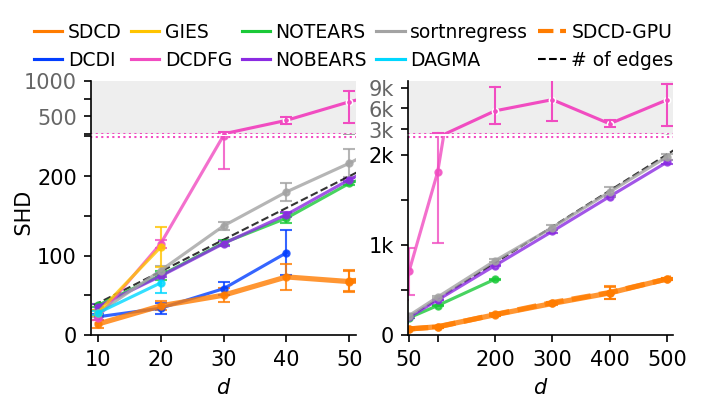

In [21]:
fig, axs = plt.subplots(
    2,
    2,
    figsize=(5, 2.2),
    dpi=150,
    gridspec_kw={"height_ratios": [0.8, 3]},
)

metric = "shd"
DEFAULT_LW = 1.5
SDCD_LW = 2.5
ERR_KW = {
    "elinewidth": 1,
    "capsize": 3,
}
HUE_ORDER = [
    "DCDI",
    "SDCD",
    "SDCD-GPU",
    "NOTEARS",
    "NOBEARS",
    "DCDFG",
    "sortnregress",
    "GIES",
    "DAGMA",
]

ALPHA = 0.8

for method_name in HUE_ORDER:
    ls = "-"
    lw = DEFAULT_LW
    if method_name == "SDCD":
        lw = SDCD_LW
    if method_name == "SDCD-GPU":
        lw = SDCD_LW
        ls = "--"

    data_filtered = observational[
        observational["Name"] == method_name
    ]
    data_groupby = data_filtered.groupby("d")[metric].agg(["mean", "std"])
    for ax in [axs[1,0], axs[1,1]]:
        ax.errorbar(
            x=data_groupby.index,
            y=data_groupby["mean"],
            yerr=data_groupby["std"],
            color=PALETTE[method_name],
            linewidth=lw,
            linestyle=ls,
            marker=".",
            **ERR_KW,
            alpha=ALPHA,
        )
    


# Plot DCDFG data separately in the upper part; hue order is for the legend
sns.lineplot(
    data=observational,
    x="d",
    y=metric,
    hue="Name",
    palette=PALETTE,
    err_style="bars",
    err_kws=ERR_KW,
    linewidth=DEFAULT_LW,
    marker=".",
    ax=axs[0, 0],
    hue_order=[
        "SDCD",
        "DCDI",
        "GIES",
        "DCDFG",
        "NOTEARS",
        "NOBEARS",
        "sortnregress",
        "DAGMA",
    ],
)
sns.lineplot(
    data=observational,
    x="d",
    y=metric,
    hue="Name",
    palette=PALETTE,
    err_style="bars",
    err_kws=ERR_KW,
    marker=".",
    linewidth=DEFAULT_LW,
    ax=axs[0, 1],
    legend=None,
    hue_order=PALETTE,
)

for ax in axs[0]:
    ax.set_facecolor("#eeeeee")


# do the cut
axs[1, 0].set_ylim(0, 250)
axs[0, 0].set_ylim(255, 900)
axs[1, 0].set_yticks([0, 50, 100, 150, 200, 250])
axs[1, 0].set_yticklabels([0, "", 100, "", 200, ""])
axs[0, 0].set_yticks([250, 500, 750, 1000])
axs[0, 0].set_yticklabels(["", "500", "", "1000"], c="#666666")

axs[1, 1].set_ylim(0, 2200)
axs[0, 1].set_ylim(2300, 10000)
axs[1, 1].set_yticks([0, 500, 1000, 1500, 2000])
axs[1, 1].set_yticklabels([0, "", "1k", "", "2k"])
axs[0, 1].set_yticks([3000, 6000, 9000])
axs[0, 1].set_yticklabels(["3k", "6k", "9k"], c="#666666")

axs[1, 0].hlines(y=249, xmin=0, xmax=1000, color=PALETTE["DCDFG"], ls=":", lw=1)
axs[0, 0].hlines(y=256, xmin=0, xmax=1000, color=PALETTE["DCDFG"], ls=":", lw=1)

axs[1, 1].hlines(y=2190, xmin=0, xmax=1000, color=PALETTE["DCDFG"], ls=":", lw=1)
axs[0, 1].hlines(y=2310, xmin=0, xmax=1100, color=PALETTE["DCDFG"], ls=":", lw=1)

#########

for j in [0, 1]:
    axs[0, j].set_xlabel("")
    axs[1, j].set_xlabel("")
    axs[0, j].set_xticks([])
    axs[1, j].set_xticks([10, 20, 30, 40, 50, 100, 200, 300, 400, 500])
    axs[1, j].set_xticklabels([10, 20, 30, 40, 50, "", 200, 300, 400, 500])

    axs[1, j].plot([0, 1000], [4 * 0, 4 * 1000], ls="--", c="black", alpha=0.8, lw=1)


axs[1, 0].set_xlim(9, 51)
axs[0, 0].set_xlim(9, 51)

axs[1, 1].set_xlim(49, 510)
axs[0, 1].set_xlim(49, 510)

axs[0, 0].spines["top"].set_visible(False)
axs[0, 0].spines["right"].set_visible(False)
axs[0, 0].spines["bottom"].set_visible(False)
axs[1, 0].spines["top"].set_visible(False)
axs[1, 0].spines["right"].set_visible(False)

axs[0, 1].spines["top"].set_visible(False)
axs[0, 1].spines["right"].set_visible(False)
axs[0, 1].spines["bottom"].set_visible(False)
axs[1, 1].spines["top"].set_visible(False)
axs[1, 1].spines["right"].set_visible(False)
# axs[1,0].spines['bottom'].set_visible(False)

axs[0, 0].set_ylabel("")
axs[0, 1].set_ylabel("")
axs[1, 1].set_ylabel("")
axs[1, 0].set_ylabel("       SHD", labelpad=1)


axs[0, 0].plot([-1], [-1], lw=2, ls="--", label="SDCD-GPU", c=PALETTE["SDCD-GPU"])
axs[0, 0].plot([-1], [-1], lw=1, ls="--", label="# of edges", c="black")

legend = axs[0, 0].legend(
    ncol=5,
    fontsize=9,
    loc="upper left",
    bbox_to_anchor=(-0.28, 2.43),  # left, top
    columnspacing=0.5,
    handletextpad=0.3,
    handlelength=1.5,
    #     bbox_to_anchor=(0, 1.3),
)
legend.get_frame().set_visible(False)

plt.subplots_adjust(
    hspace=0.02,
    wspace=0.2,
)

axs[1, 0].set_xlabel("$d$")
axs[1, 1].set_xlabel("$d$")
plt.savefig("observational-shd.pdf", bbox_inches="tight", pad_inches=0, bbox_extra_artists=[legend])
plt.show()

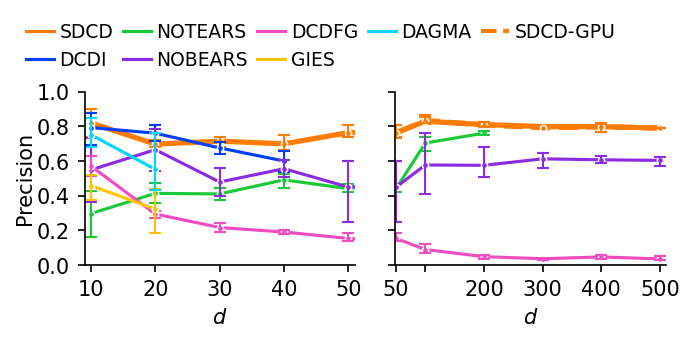

In [22]:
# observational precision plot
fig, axs = plt.subplots(
    1,
    2,
    figsize=(5, 1.5),
    dpi=150,
    gridspec_kw={"height_ratios": [1], "width_ratios": [1, 1]},
    squeeze=False,
)
metric = "precision"
for i in range(3):
    ls = "-"
    lw = DEFAULT_LW
    if i == 1:
        observational_filtered = observational[
            ~observational["Name"].isin(["SDCD", "SDCD-GPU"])
        ]
    elif i == 0:
        observational_filtered = observational[(observational["Name"] == "SDCD")]
        lw = SDCD_LW
    elif i == 2:
        observational_filtered = observational[(observational["Name"] == "SDCD-GPU")]
        lw = SDCD_LW
        ls = "--"

    observational_filtered = observational_filtered.copy()
    observational_filtered["train_time"] /= 60

    observational_filtered = observational_filtered[
        observational_filtered["Name"].isin(PALETTE)
    ]

    sns.lineplot(
        data=observational_filtered,
        x="d",
        y=metric,
        hue="Name",
        palette=PALETTE,
        linewidth=lw,
        ls=ls,
        err_style="bars",
        err_kws=ERR_KW,
        marker=".",
        ax=axs[0, 0],
        legend=None if i != 0 else True,
        hue_order=[
            "SDCD",
            "DCDI",
            "NOTEARS",
            "NOBEARS",
            "DCDFG",
            "GIES",
            "DAGMA",
        ],
    )
    sns.lineplot(
        data=observational_filtered,
        x="d",
        y=metric,
        hue="Name",
        palette=PALETTE,
        linewidth=lw,
        ls=ls,
        err_style="bars",
        err_kws=ERR_KW,
        marker=".",
        ax=axs[0, 1],
        legend=None,
        hue_order=[
            "SDCD",
            "SDCD-GPU",
            "DCDI",
            "NOTEARS",
            "NOBEARS",
            "DCDFG",
            "GIES",
            "DAGMA",
        ],
    )
for j in [0, 1]:
    axs[0, j].set_xlabel("")
    axs[0, j].set_xlabel("$d$")
    axs[0, j].set_xticks([])
    axs[0, j].set_xticks([10, 20, 30, 40, 50, 100, 200, 300, 400, 500])
    axs[0, j].set_xticklabels([10, 20, 30, 40, 50, "", 200, 300, 400, 500])

axs[0, 0].set_xlim(9, 51)
axs[0, 1].set_xlim(49, 510)

axs[0, 0].set_ylim(0, 1)
axs[0, 0].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
axs[0, 1].set_ylim(0, 1)
axs[0, 1].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
axs[0, 1].set_yticklabels([])

axs[0, 0].spines["top"].set_visible(False)
axs[0, 0].spines["right"].set_visible(False)
axs[0, 1].spines["top"].set_visible(False)
axs[0, 1].spines["right"].set_visible(False)


axs[0, 0].set_ylabel("Precision", labelpad=0.8)
axs[0, 1].set_ylabel("")

axs[0, 0].plot([-1], [-1], lw=2, ls="--", label="SDCD-GPU", c=PALETTE["SDCD-GPU"])

legend = axs[0, 0].legend(
    ncol=5,
    fontsize=9,
    loc="upper left",
    bbox_to_anchor=(-0.28, 1.5),  # left, top
    columnspacing=0.5,
    handletextpad=0.3,
    handlelength=1.5,
    #     bbox_to_anchor=(0, 1.3),
)
legend.get_frame().set_visible(False)

plt.subplots_adjust(
    hspace=0.02,
    wspace=0.15,
)

plt.savefig("observational-precision.pdf", bbox_inches="tight", pad_inches=0, bbox_extra_artists=[legend])
plt.show()

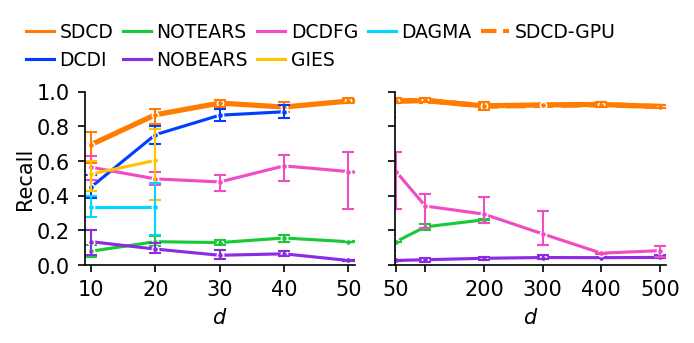

In [23]:
# observational recall plot
fig, axs = plt.subplots(
    1,
    2,
    figsize=(5, 1.5),
    dpi=150,
    gridspec_kw={"height_ratios": [1], "width_ratios": [1, 1]},
    squeeze=False,
)
metric = "recall"
for i in range(3):
    ls = "-"
    lw = DEFAULT_LW
    if i == 1:
        observational_filtered = observational[
            ~observational["Name"].isin(["SDCD", "SDCD-GPU"])
        ]
    elif i == 0:
        observational_filtered = observational[(observational["Name"] == "SDCD")]
        lw = SDCD_LW
    elif i == 2:
        observational_filtered = observational[(observational["Name"] == "SDCD-GPU")]
        lw = SDCD_LW
        ls = "--"

    observational_filtered = observational_filtered.copy()
    observational_filtered["train_time"] /= 60

    observational_filtered = observational_filtered[
        observational_filtered["Name"].isin(PALETTE)
    ]

    sns.lineplot(
        data=observational_filtered,
        x="d",
        y=metric,
        hue="Name",
        palette=PALETTE,
        linewidth=lw,
        ls=ls,
        err_style="bars",
        err_kws=ERR_KW,
        marker=".",
        ax=axs[0, 0],
        legend=None if i != 0 else True,
        hue_order=[
            "SDCD",
            "DCDI",
            "NOTEARS",
            "NOBEARS",
            "DCDFG",
            "GIES",
            "DAGMA",
        ],
    )
    sns.lineplot(
        data=observational_filtered,
        x="d",
        y=metric,
        hue="Name",
        palette=PALETTE,
        linewidth=lw,
        ls=ls,
        err_style="bars",
        err_kws=ERR_KW,
        marker=".",
        ax=axs[0, 1],
        legend=None,
        hue_order=[
            "SDCD",
            "SDCD-GPU",
            "DCDI",
            "NOTEARS",
            "NOBEARS",
            "DCDFG",
            "GIES",
            "DAGMA",
        ],
    )
for j in [0, 1]:
    axs[0, j].set_xlabel("")
    axs[0, j].set_xlabel("$d$")
    axs[0, j].set_xticks([])
    axs[0, j].set_xticks([10, 20, 30, 40, 50, 100, 200, 300, 400, 500])
    axs[0, j].set_xticklabels([10, 20, 30, 40, 50, "", 200, 300, 400, 500])

axs[0, 0].set_xlim(9, 51)
axs[0, 1].set_xlim(49, 510)

axs[0, 0].set_ylim(0, 1)
axs[0, 0].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
axs[0, 1].set_ylim(0, 1)
axs[0, 1].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
axs[0, 1].set_yticklabels([])

axs[0, 0].spines["top"].set_visible(False)
axs[0, 0].spines["right"].set_visible(False)
axs[0, 1].spines["top"].set_visible(False)
axs[0, 1].spines["right"].set_visible(False)


axs[0, 0].set_ylabel("Recall", labelpad=0.8)
axs[0, 1].set_ylabel("")

axs[0, 0].plot([-1], [-1], lw=2, ls="--", label="SDCD-GPU", c=PALETTE["SDCD-GPU"])

legend = axs[0, 0].legend(
    ncol=5,
    fontsize=9,
    loc="upper left",
    bbox_to_anchor=(-0.28, 1.5),  # left, top
    columnspacing=0.5,
    handletextpad=0.3,
    handlelength=1.5,
    #     bbox_to_anchor=(0, 1.3),
)
legend.get_frame().set_visible(False)
legend.get_texts()[0].set_text("SDCD")

plt.subplots_adjust(
    hspace=0.02,
    wspace=0.15,
)

plt.savefig("observational-recall.pdf", bbox_inches="tight", pad_inches=0, bbox_extra_artists=[legend])
plt.show()

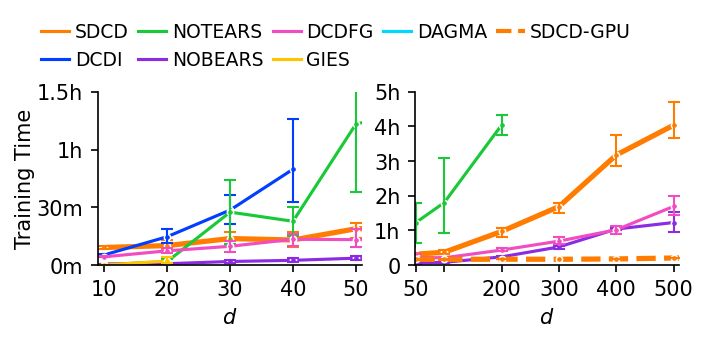

In [24]:
fig, axs = plt.subplots(
    1,
    2,
    figsize=(5, 1.5),
    dpi=150,
    gridspec_kw={"height_ratios": [1], "width_ratios": [1, 1]},
    squeeze=False,
)
metric = "train_time"
for i in range(3):
    ls = "-"
    lw = DEFAULT_LW
    if i == 1:
        observational_filtered = observational[
            ~observational["Name"].isin(["SDCD", "SDCD-GPU"])
        ]
    elif i == 0:
        observational_filtered = observational[(observational["Name"] == "SDCD")]
        lw = SDCD_LW
    elif i == 2:
        observational_filtered = observational[(observational["Name"] == "SDCD-GPU")]
        lw = SDCD_LW
        ls = "--"

    observational_filtered = observational_filtered.copy()
    observational_filtered["train_time"] /= 60

    observational_filtered = observational_filtered[
        observational_filtered["Name"].isin(PALETTE)
    ]

    sns.lineplot(
        data=observational_filtered,
        x="d",
        y=metric,
        hue="Name",
        palette=PALETTE,
        linewidth=lw,
        ls=ls,
        err_style="bars",
        err_kws=ERR_KW,
        marker=".",
        ax=axs[0, 0],
        legend=None if i != 0 else True,
        hue_order=[
            "SDCD",
            "DCDI",
            "NOTEARS",
            "NOBEARS",
            "DCDFG",
            "GIES",
            "DAGMA",
        ],
    )
    sns.lineplot(
        data=observational_filtered,
        x="d",
        y=metric,
        hue="Name",
        palette=PALETTE,
        linewidth=lw,
        ls=ls,
        err_style="bars",
        err_kws=ERR_KW,
        marker=".",
        ax=axs[0, 1],
        legend=None,
        hue_order=[
            "SDCD",
            "SDCD-GPU",
            "DCDI",
            "NOTEARS",
            "NOBEARS",
            "DCDFG",
            "GIES",
            "DAGMA",
        ],
    )
for j in [0, 1]:
    axs[0, j].set_xlabel("")
    axs[0, j].set_xlabel("$d$")
    axs[0, j].set_xticks([])
    axs[0, j].set_xticks([10, 20, 30, 40, 50, 100, 200, 300, 400, 500])
    axs[0, j].set_xticklabels([10, 20, 30, 40, 50, "", 200, 300, 400, 500])

axs[0, 0].set_xlim(9, 51)
axs[0, 1].set_xlim(49, 510)

axs[0, 0].set_ylim(0, 90)
axs[0, 0].set_yticks([0, 30, 60, 90])
axs[0, 0].set_yticklabels(["0m", "30m", "1h", "1.5h"])
axs[0, 1].set_ylim(0, 300)
axs[0, 1].set_yticks([0, 60, 120, 180, 240, 300])
axs[0, 1].set_yticklabels(["0", "1h", "2h", "3h", "4h", "5h"])

axs[0, 0].spines["top"].set_visible(False)
axs[0, 0].spines["right"].set_visible(False)
axs[0, 1].spines["top"].set_visible(False)
axs[0, 1].spines["right"].set_visible(False)


axs[0, 0].set_ylabel("Training Time", labelpad=0.8)
axs[0, 1].set_ylabel("")

axs[0, 0].plot([-1], [-1], lw=2, ls="--", label="SDCD-GPU", c=PALETTE["SDCD-GPU"])

legend = axs[0, 0].legend(
    ncol=5,
    fontsize=9,
    loc="upper left",
    bbox_to_anchor=(-0.28, 1.5),  # left, top
    columnspacing=0.5,
    handletextpad=0.3,
    handlelength=1.5,
    #     bbox_to_anchor=(0, 1.3),
)
legend.get_frame().set_visible(False)
legend.get_texts()[0].set_text("SDCD")

plt.subplots_adjust(
    hspace=0.02,
    wspace=0.2,
)

plt.savefig("observational-time.pdf", bbox_inches="tight", pad_inches=0, bbox_extra_artists=[legend])
plt.show()

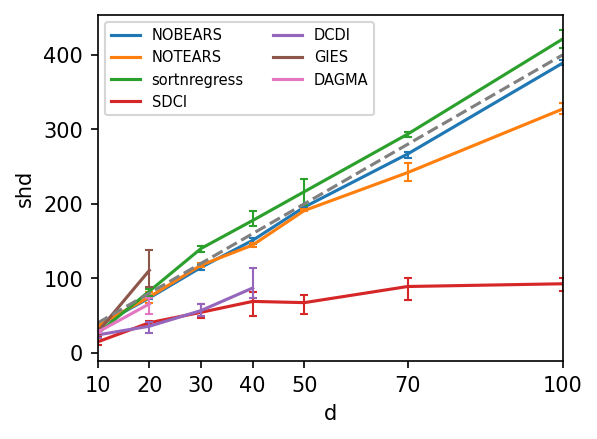

In [25]:
observational_large = observational[(observational["d"] > 700) & (observational["Name"] == "SDCD-GPU")]
observational_large[["d", "shd", "train_time", "precision", "recall"]]

,d,shd,train_time,precision,recall
330,1000,1481.0,1155.893750,0.758024,0.897500
332,1000,1464.0,1040.608328,0.757778,0.907250
334,1000,1371.0,1018.786213,0.766032,0.925750
335,2000,3392.0,2757.324106,0.722521,0.905500
336,2000,3276.0,2700.405865,0.728005,0.915375
337,2000,3402.0,2725.749645,0.720568,0.907375
338,3000,5236.0,5510.863886,0.711521,0.919167
339,3000,5109.0,5456.258696,0.717055,0.921833
340,4000,7324.0,9858.628942,0.700601,0.917875
341,4000,7810.0,8513.347492,0.685812,0.914188


/var/folders/b8/q31klnzn0yx0pkz17v8dpdpm0000gn/T/ipykernel_77631/1724921983.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles, labels = legend.legendHandles, [t.get_text() for t in legend.get_texts()]


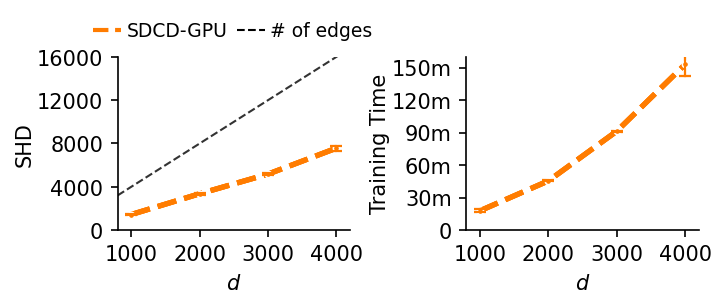

(None,)

In [26]:
# plot shd and runtime side by side
fig, axs = plt.subplots(
    1,
    2,
    figsize=(5, 1.5),
    dpi=150,
    gridspec_kw={"height_ratios": [1], "width_ratios": [1, 1]},
    squeeze=False,
)
for i in range(3):
    ls = "--"
    lw = SDCD_LW
    observational_filtered = observational_large

    observational_filtered = observational_filtered.copy()
    observational_filtered["train_time"] /= 60

    observational_filtered = observational_filtered[
        observational_filtered["Name"].isin(PALETTE)
    ]

    sns.lineplot(
        data=observational_filtered,
        x="d",
        y="shd",
        hue="Name",
        palette=PALETTE,
        linewidth=lw,
        ls=ls,
        err_style="bars",
        err_kws=ERR_KW,
        marker=".",
        ax=axs[0, 0],
        legend=None if i != 0 else True,
    )
    sns.lineplot(
        data=observational_filtered,
        x="d",
        y="train_time",
        hue="Name",
        palette=PALETTE,
        linewidth=lw,
        ls=ls,
        err_style="bars",
        err_kws=ERR_KW,
        marker=".",
        ax=axs[0, 1],
        legend=None,
    )
for j in [0, 1]:
    axs[0, j].set_xlabel("")
    axs[0, j].set_xlabel("$d$")
    axs[0, j].set_xticks([])
    axs[0, j].set_xticks([1000, 2000, 3000, 4000])
    axs[0, j].set_xticklabels([1000, 2000, 3000, 4000])

axs[0, 0].plot([800, 4200], [4 * 800, 4 * 4200], ls="--", c="black", alpha=0.8, lw=1)

axs[0, 0].set_xlim(800, 4200)
axs[0, 1].set_xlim(800, 4200)

axs[0, 0].set_ylim(0, 16000)
axs[0, 0].set_yticks([0, 4000, 8000, 12000, 16000])
# axs[0, 0].set_yticklabels(["0m", "30m", "1h", "1.5h"])
axs[0, 1].set_ylim(0, 160)
axs[0, 1].set_yticks([0, 30, 60, 90, 120, 150])
axs[0, 1].set_yticklabels(["0", "30m", "60m", "90m", "120m", "150m"])

axs[0, 0].spines["top"].set_visible(False)
axs[0, 0].spines["right"].set_visible(False)
axs[0, 1].spines["top"].set_visible(False)
axs[0, 1].spines["right"].set_visible(False)


axs[0, 0].set_ylabel("SHD", labelpad=0.8)
axs[0, 1].set_ylabel("Training Time", labelpad=0.8)

axs[0, 0].plot([-1], [-1], lw=2, ls="--", label="SDCD-GPU", c=PALETTE["SDCD-GPU"])
axs[0, 0].plot([-1], [-1], lw=1, ls="--", label="# of edges", c="black")

legend = axs[0, 0].legend()
legend.get_frame().set_visible(False)
legend.set_visible(False)
handles, labels = legend.legendHandles, [t.get_text() for t in legend.get_texts()]
new_legend = axs[0,0].legend(handles[1:], labels[1:],
    ncol=5,
    fontsize=9,
    loc="upper left",
    bbox_to_anchor=(-0.18, 1.3),  # left, top
    columnspacing=0.5,
    handletextpad=0.3,
    handlelength=1.5,
    #     bbox_to_anchor=(0, 1.3),
                        )
new_legend.get_frame().set_visible(False)
   
plt.subplots_adjust(
    hspace=0.02,
    wspace=0.5,
)

plt.savefig("observational-large.pdf", bbox_inches="tight", pad_inches=0, bbox_extra_artists=[new_legend])
plt.show(),

/var/folders/b8/q31klnzn0yx0pkz17v8dpdpm0000gn/T/ipykernel_77631/1714689710.py:78: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles, labels = legend.legendHandles, [t.get_text() for t in legend.get_texts()]


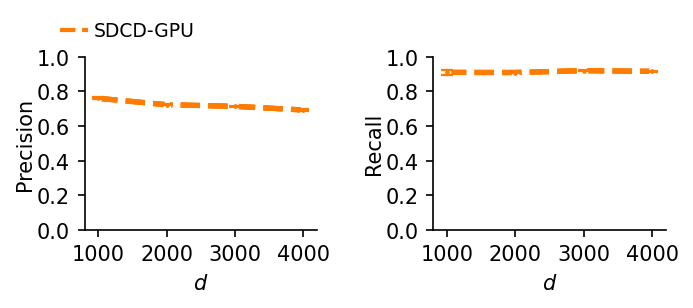

(None,)

In [27]:
# plot recall and precision side by side
fig, axs = plt.subplots(
    1,
    2,
    figsize=(5, 1.5),
    dpi=150,
    gridspec_kw={"height_ratios": [1], "width_ratios": [1, 1]},
    squeeze=False,
)
for i in range(3):
    ls = "--"
    lw = SDCD_LW
    observational_filtered = observational_large

    observational_filtered = observational_filtered.copy()

    observational_filtered = observational_filtered[
        observational_filtered["Name"].isin(PALETTE)
    ]

    sns.lineplot(
        data=observational_filtered,
        x="d",
        y="precision",
        hue="Name",
        palette=PALETTE,
        linewidth=lw,
        ls=ls,
        err_style="bars",
        err_kws=ERR_KW,
        marker=".",
        ax=axs[0, 0],
        legend=None if i != 0 else True,
    )
    sns.lineplot(
        data=observational_filtered,
        x="d",
        y="recall",
        hue="Name",
        palette=PALETTE,
        linewidth=lw,
        ls=ls,
        err_style="bars",
        err_kws=ERR_KW,
        marker=".",
        ax=axs[0, 1],
        legend=None,
    )
for j in [0, 1]:
    axs[0, j].set_xlabel("")
    axs[0, j].set_xlabel("$d$")
    axs[0, j].set_xticks([])
    axs[0, j].set_xticks([1000, 2000, 3000, 4000])
    axs[0, j].set_xticklabels([1000, 2000, 3000, 4000])

axs[0, 0].set_xlim(800, 4200)
axs[0, 1].set_xlim(800, 4200)

axs[0, 0].set_ylim(0, 1)
axs[0, 0].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
axs[0, 1].set_ylim(0, 1)
axs[0, 1].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])

axs[0, 0].spines["top"].set_visible(False)
axs[0, 0].spines["right"].set_visible(False)
axs[0, 1].spines["top"].set_visible(False)
axs[0, 1].spines["right"].set_visible(False)


axs[0, 0].set_ylabel("Precision", labelpad=0.8)
axs[0, 1].set_ylabel("Recall", labelpad=0.8)

axs[0, 0].plot([-1], [-1], lw=2, ls="--", label="SDCD-GPU", c=PALETTE["SDCD-GPU"])

legend = axs[0, 0].legend()
legend.get_frame().set_visible(False)
legend.set_visible(False)
handles, labels = legend.legendHandles, [t.get_text() for t in legend.get_texts()]
new_legend = axs[0,0].legend(handles[1:], labels[1:],
    ncol=5,
    fontsize=9,
    loc="upper left",
    bbox_to_anchor=(-0.18, 1.3),  # left, top
    columnspacing=0.5,
    handletextpad=0.3,
    handlelength=1.5,
    #     bbox_to_anchor=(0, 1.3),
                        )
new_legend.get_frame().set_visible(False)
   
plt.subplots_adjust(
    hspace=0.02,
    wspace=0.5,
)

plt.savefig("observational-large-precision-recall.pdf", bbox_inches="tight", pad_inches=0, bbox_extra_artists=[new_legend])
plt.show(),

In [28]:
# observational table
def format_mean_std(row):
    if np.isnan(row[('shd', 'mean')]):
        return "NA"
    return f"{row[('shd', 'mean')]:.1f} ${{\scriptstyle \pm {row[('shd', 'std')]:.1f}}}$"

all_observational = observational[["Name", "shd", "d"]]
all_observational = all_observational[all_observational["d"] <= 500]

all_observational['method'] = pd.Categorical(all_observational['Name'], categories=["SDCD", "SDCD-GPU", "DCDI", "DCDFG", "GIES", "DAGMA", "NOTEARS", "NOBEARS", "sortnregress"], ordered=True)
grouped = all_observational.groupby(['method', 'd']).agg({'shd': ['mean', 'std']}).reset_index()
grouped['combined'] = grouped.apply(format_mean_std, axis=1)
pivot_table = pd.pivot_table(grouped, values='combined', index=['d'], columns=['method'], aggfunc=lambda x: str(next(iter(x))))
pivot_table = pivot_table.iloc[:, :len(all_observational["method"].cat.categories)]
pivot_table.columns = pivot_table.columns.get_level_values(1)

# Export to LaTeX
pivot_table.columns = ["SDCD", "SDCD-GPU", "DCDI", "DCDFG", "GIES","DAGMA", "NOTEARS", "NOBEARS", "sortnregress"]
latex_str = pivot_table.to_latex(escape=False, na_rep='')
print(latex_str)

\begin{tabular}{llllllllll}
\toprule
{} &                             SDCD &                         SDCD-GPU &                             DCDI &                               DCDFG &                             GIES &                           DAGMA &                         NOTEARS &                           NOBEARS &                      sortnregress \\
d   &                                  &                                  &                                  &                                     &                                  &                                 &                                 &                                   &                                   \\
\midrule
10  &    13.8 ${\scriptstyle \pm 4.8}$ &                               NA &    23.0 ${\scriptstyle \pm 3.7}$ &       22.0 ${\scriptstyle \pm 3.3}$ &    28.0 ${\scriptstyle \pm 3.6}$ &   27.7 ${\scriptstyle \pm 2.1}$ &   37.4 ${\scriptstyle \pm 2.3}$ &     35.8 ${\scriptstyle \pm 3.8}$ &     27.6 ${\scrip

/var/folders/b8/q31klnzn0yx0pkz17v8dpdpm0000gn/T/ipykernel_77631/1015350567.py:19: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_str = pivot_table.to_latex(escape=False, na_rep='')


In [29]:
# observational large table
def format_mean_std(row):
    if np.isnan(row[('shd', 'mean')]):
        return "NA"
    return f"{row[('shd', 'mean')]:.1f} ${{\scriptstyle \pm {row[('shd', 'std')]:.1f}}}$"

all_observational = observational[["Name", "shd", "d"]]
all_observational = all_observational[all_observational["d"] > 700]

all_observational['method'] = pd.Categorical(all_observational['Name'], categories=["SDCD-GPU"], ordered=True)
grouped = all_observational.groupby(['method', 'd']).agg({'shd': ['mean', 'std']}).reset_index()
grouped['combined'] = grouped.apply(format_mean_std, axis=1)
pivot_table = pd.pivot_table(grouped, values='combined', index=['d'], columns=['method'], aggfunc=lambda x: str(next(iter(x))))
pivot_table = pivot_table.iloc[:, :len(all_observational["method"].cat.categories)]
pivot_table.columns = pivot_table.columns.get_level_values(1)

# Export to LaTeX
pivot_table.columns = ["SDCD-GPU"]
latex_str = pivot_table.to_latex(escape=False, na_rep='')
print(latex_str)

\begin{tabular}{ll}
\toprule
{} &                           SDCD-GPU \\
d    &                                    \\
\midrule
1000 &   1438.7 ${\scriptstyle \pm 59.2}$ \\
2000 &   3356.7 ${\scriptstyle \pm 70.0}$ \\
3000 &   5172.5 ${\scriptstyle \pm 89.8}$ \\
4000 &  7567.0 ${\scriptstyle \pm 343.7}$ \\
\bottomrule
\end{tabular}



/var/folders/b8/q31klnzn0yx0pkz17v8dpdpm0000gn/T/ipykernel_77631/1384545388.py:19: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_str = pivot_table.to_latex(escape=False, na_rep='')
